The recipr for applying s supervised machine learning model is: <br>
1. Choose a class of model<br>
2. Choose model hyperparameters<br>
3. Fit the model to the training data<br>
4. Use the model to predict labels for the new Data<br><br>

The first 2 points are perhaps the most important part of using. In order to make an informed choice we need a way to validate that our model and our hyperparameters are a good fit to the data. While this may sound simple, there are some pitfalls that must be avoided.

## Model validation
In principle, model validation is very simple: after choosing a model and its hyperparameters we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.<br>
The following section shows the naive approach to model validation and why it fails before exploring the use of holdout sets and cross-validation for more robust model evaluation.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Next we choose a model and hyperparameters. Here we'll use a k-neighbors classifier with n_neighbors=1. This is a very simple and intuitive model that says "the label of an unknown point is the same as the label of its closest training point:"

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
#Then we train the model and use it to predict labeels for data we know
model.fit(X, y)
y_model = model.predict(X)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

As you may have gathered, the answer is no. In fact, this approach contains a fundamental flaw: it trains and evaluates the model on the same data. Furthermore, the nearest neighbor model is an instance-based estimator that simply stores the training data, and predicts labels by comparing new data to these stored points: except in contrived cases, it will get 100% accuracy every time!

## Model validation the right way: Holdout sets
A better sense of a model'sperformance can be found using whats known as a holdout set, that is we hold back some subset of the data from the training of the model and then use this holdout set to check the model performance. This splitting can be done using the train_test_split utility 

In [5]:
from sklearn.model_selection import train_test_split
#split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

#fit the model on 1 set of data
model.fit(X1, y1)
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

## Model validation via cross-validation
One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. In above example as 50% of the data is not trained upon, this will not work well in short datasets.
<br>
One another way is to use cross-validation; that is to do a sequence of fits where each subset of the data is used both as a training set and as a validation set.<br>
Here we do 2 validatin trials, alternatively using each half of the data as holdout set. Using the split data from before, we could implemeent it.

In [6]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

The outcome is 2 accuracy_scores which we could combine say using mean to get a better measure of the global model performance. This particular form of cross-validation is a 2 fold cross-validation that is one in which we have split the data into 2 sets and used each in turn as a validation set.
<br>
More we can split the dataset into 5 sets and use each of them to evaluate the model fit on the other 4/5 of the data. This can be easily done by <b>cross_val_score</b> convenience routine.

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Repeating the validation across different subsets of the data gives us an even better idea of the performance of the algorithm. Scikit-Learn implements a number of useful cross-validation schemes that are useful in particular situations. <br><br>
For eg, we might wish to go to the eextreme ease in which our number of folds is equal to the number of data points, that is we train on all points but one in each trial. This type of cross-validation is known as the <b>leave-one-out</b> cross-validation.

In [8]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv = LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Because we have 150 samples, the leave one out cross-validation yields scores for 150 trials, and the score indicates either successful (1.0) or unsuccessful (0.0) prediction. Taking the mean of these gives an estimate of the error rate:

In [9]:
scores.mean()

0.96

# Selecting the best model
Lets go into a little depth of model selection and selection of hyperparameters. These issues are some of the most important aspects of the practice of machine learning.<br>
Of core importance is the following question: If our estimator is underperforming, how could we move forward?
1. Use a more complicated/more flexible model<br>
2. Use a less complicated/less flexible model<br>
3. Gather more training samples.<br>
4. Gather more data to add features to each sample<br>
But sometimes it can be opposite.
<br>
## Tha Bias-variance trade-off
Fundamentally the question of the best model is about finding a sweet spot between bias and variance.

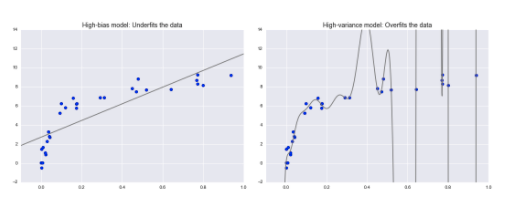

It is clear that neither of thesee models is a particularly good fit to the data but they fail in different ways. The first attempts to find a straight but the data is more complicated than a straight line, so its <b>underfitting</b> the data. It does not have enough model flexibility to suitable account for all the features in the data. Another way is to say that the model has <b>high bias</b>.<br>
The model on the right attempts to fit a high order polynomial through data. Here the model is <b>overfitted</b> and it has noise properties of the data rather than intrinsic properties of whatever process generated that data. This model has <b>high variance</b><br><br>

The score of R^2 or coefficient of determination which measures how well a model performs relative to a simple mean of the target values. R^2=1 indicates a perfect match and R^2=0 indicates the model does not do any bettern than simple taking the mean of the data, and negative values means even worse models.<br><br>

For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

If we imagine that we have some ability to tune the model complexity, we would expect the training score and validation score to behave as illustrated in the following figure:

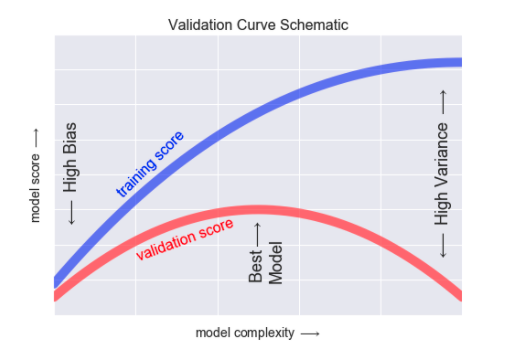

The diagram is often called the validation curve and we see the following features:<br>
1. Generally the training score everywhere is higher than the validation score. As the model will be a better fit to data it has seen than to a data it has not seen.<br>
2. For very low model complexity (a high-bias model), the training data is under-fit, which means that the model is a poor predictor both for the training data and for any previously unseen data.<br>
3. For very high model complexity (a high-variance model), the training data is over-fit, which means that the model predicts the training data very well, but fails for any previously unseen data.<br>
4. For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.<br>

## Validation Curvees in Scikit-Learn
Using a polynomial regression model, this is a generalized linear model in which the degree of the polynomial is a tunable parameter. For example a degree 1 polynomial fits a straight line to the data like <b><i>y = ax + b</i></b><br>
A degree 3 polynomial fits a cubic curve to the data eg. <b><i>y = ax^3 + bx^2 + cx + d</i></b>.<br>
We can genelize this to any number of polynomial features. In scikit-learn we can implement this with a simple linear regression combined with the polynomial preprocessor. We will use a pipeline to string these operations together.

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

#Lets create some data to fit our model


In [11]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    #randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err + rng.randn(N)
    return X, y

X, y = make_data(40)

We can now visualize our data, along with polynomial fits of several degrees:



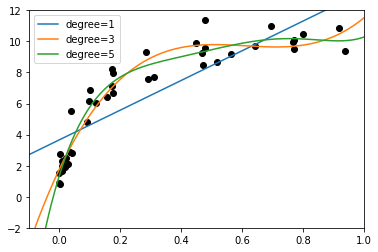

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

Xtest = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1,3,5]:
    ytest = PolynomialRegression(degree).fit(X, y).predict(Xtest)
    plt.plot(Xtest.ravel(), ytest, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')
    
    
    

The knob controlling model complexity in this case is the degree of the polynomial which can be any non-negative integer. A useful question to answer this what degree of the polynomial provides a suitable trade-off between bias(underfitting) and variance(overfitting).<br><br>

We can make progress in this by visualizing the validation curve ofr this particular data and model; this can be done straightforwardly using the "validation_curve" convenience routine provided by Scikit-learn. Given a model, data, parameter name and a range to explore, this function will automatically compute both the training score and validation score across the range:

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0, 0.5, 'score')

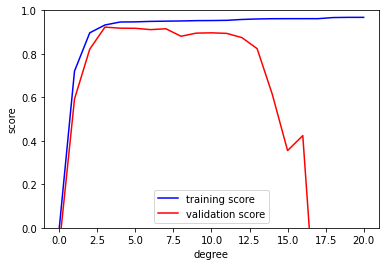

In [13]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

This shows precisely the qualitative behavior we expect: the training score is everywhere higher than the validation score; the training score is monotonically improving with increased model complexity; and the validation score reaches a maximum before dropping off as the model becomes over-fit.<br><br>

From the validation curve, we can read-off that the optimal trade-off between bias and variance is found for a third-order polynomial; we can compute and display this fit over the original data as follows:

<br>
The optimal trade off between the training curve and the validation curve is the x-coordinate of the peak or maximum value before dropping of the validation curve.

(-0.04687651021505175,
 0.9844070023112612,
 0.2691822883444204,
 11.902869392322714)

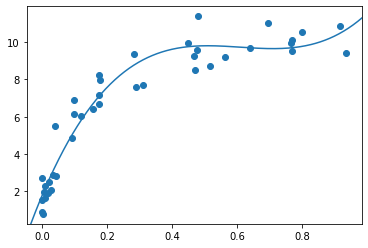

In [14]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
ytest = PolynomialRegression(3).fit(X, y).predict(Xtest)
plt.plot(Xtest.ravel(),ytest)
plt.axis(lim)

Notice that finding this optimal model did not actually require us to compute the training score, but examining the relationship between the training score and validation score can give us useful insight into the performance of the model.

# Learning curves
One important aspect of model complexity is that the optimal model will generally depend on the size of the training data. For example lets make a new dataset with a factor of 5 more points.

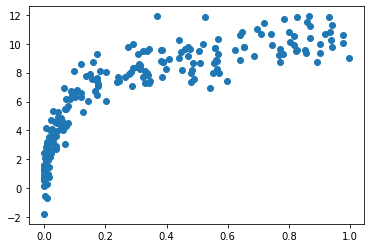

In [19]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


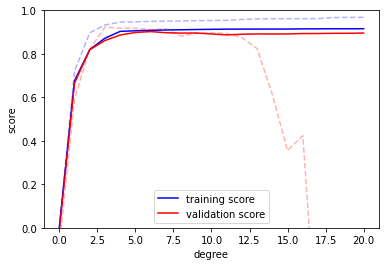

In [20]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

The solid lines show the new results, while the fainter dashed lines show the results of the previous smaller dataset. It is clear from the validation curve that the larger dataset can support a much more complicated model: the peak here is probably around a degree of 6, but even a degree-20 model is not seriously over-fitting the data—the validation and training scores remain very close.

<br>
Thus we see that the behavior of the validation curve has not one but <b>two</b> important inputs: the <b>model complexity</b> and the <b>number of training points</b>. It is often useful to to explore the behavior of the model as a function of the number of training points, which we can do by using increasingly larger subsets of the data to fit our model. A plot of the training/validation score with respect to the size of the training set is known as a <b>learning curve</b>.<br>
The general behavior we would expect from a learning curve is this:

1. A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
2. A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.
3. A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

<br><br>
The notable feature of the learning curve is the convergence to a particular score as the number of training samples grows. In particular, once you have enough points that a particular model has converged, adding more training data will not help you! The only way to increase model performance in this case is to use another (often more complex) model.
<br>
## Learning curves in Scikit-learn
Scikit-Learn offers a convenient utility for computing such learning curves from your models; here we will compute a learning curve for our original dataset with a second-order polynomial model and a ninth-order polynomial:

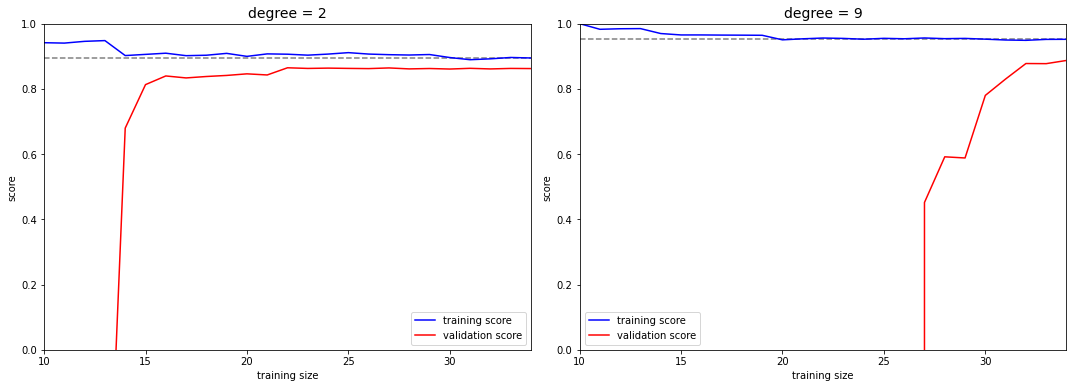

In [25]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2,9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X, y, cv=7,
                                        train_sizes=np.linspace(0.3,1,25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')


This is a valuable diagnostic, because it gives us a visual depiction of how our model responds to increasing training data. In particular, when your learning curve has already converged (i.e., when the training and validation curves are already close to each other) adding more training data will not significantly improve the fit! This situation is seen in the left panel, with the learning curve for the degree-2 model.

<br>The only way to increase the converged score is to use a different (usually more complicated) model. We see this in the right panel: by moving to a much more complicated model, we increase the score of convergence (indicated by the dashed line), but at the expense of higher model variance (indicated by the difference between the training and validation scores). If we were to add even more data points, the learning curve for the more complicated model would eventually converge.

<br>Plotting a learning curve for your particular choice of model and dataset can help you to make this type of decision about how to move forward in improving your analysis.

# Validation in practive: Grid Search
The preceding discussion is meant to give you some intuition into the trade-off between bias and variance and its dependance on the model complexity and training set size. So the plots of validation and learning curves might not be simple lines but more complex multi-dimensional surfaces and would be difficult to use.<br><br>
Scikit-Learn provides automated tools to do this in the grid search module. Here is an example of using grid search to find the optimal polynomial model. We will explore a three-dimensional grid of model features; namely the polynomial degree, the flag telling us whether to fit the intercept, and the flag telling us whether to normalize the problem. This can be set up using Scikit-Learn's GridSearchCV meta-estimator:

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
             'linearregression__fit_intercept': [True, False],
             'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [28]:
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [29]:
grid.best_params_ # To get the best params for a polynomial regression model

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

Finally, if we wish, we can use the best model and show the fit to our data using code from before:

(-0.04687651021505175,
 0.9844070023112612,
 0.2691822883444204,
 11.902869392322714)

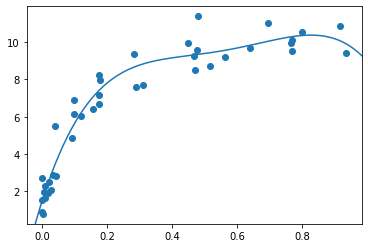

In [32]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(Xtest)
plt.plot(Xtest.ravel(), y_test)
plt.axis(lim)

In this section, we have begun to explore the concept of model validation and hyperparameter optimization, focusing on intuitive aspects of the bias–variance trade-off and how it comes into play when fitting models to data. In particular, we found that the use of a validation set or cross-validation approach is vital when tuning parameters in order to avoid over-fitting for more complex/flexible models.

In later sections, we will discuss the details of particularly useful models, and throughout will talk about what tuning is available for these models and how these free parameters affect model complexity. Keep the lessons of this section in mind as you read on and learn about these machine learning approaches!